Epoch 1/10, Loss: 0.4910
Epoch 2/10, Loss: 0.2543
Epoch 3/10, Loss: 0.2083
Epoch 4/10, Loss: 0.1856
Epoch 5/10, Loss: 0.1711
Epoch 6/10, Loss: 0.1597
Epoch 7/10, Loss: 0.1490
Epoch 8/10, Loss: 0.1467
Epoch 9/10, Loss: 0.1400
Epoch 10/10, Loss: 0.1311
Model training complete. Weights saved to 'model.pth'.
Accuracy on the MNIST test dataset: 96.85%


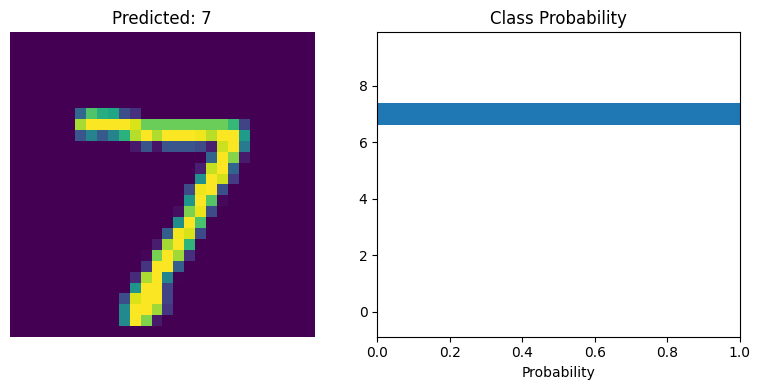

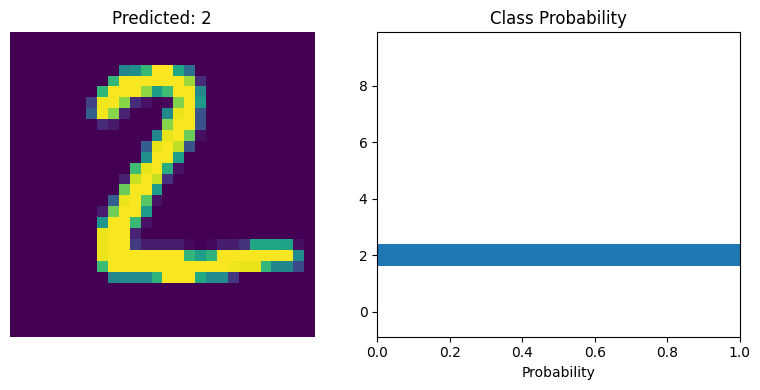

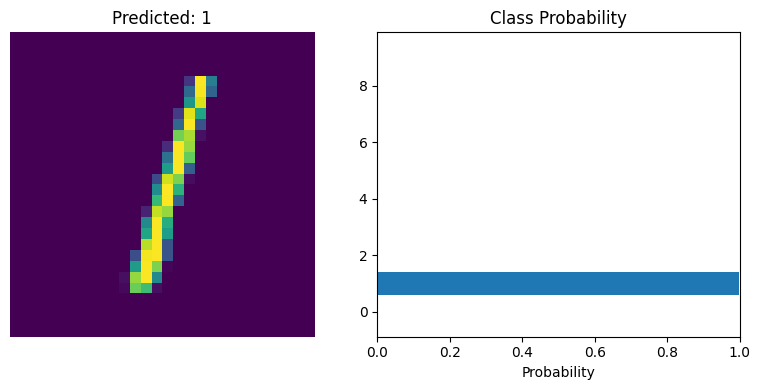

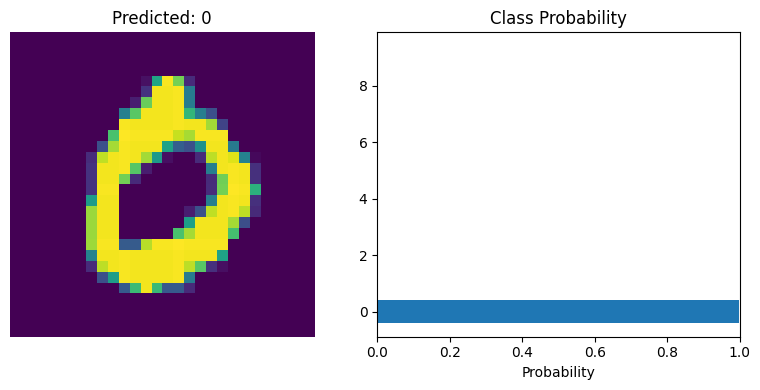

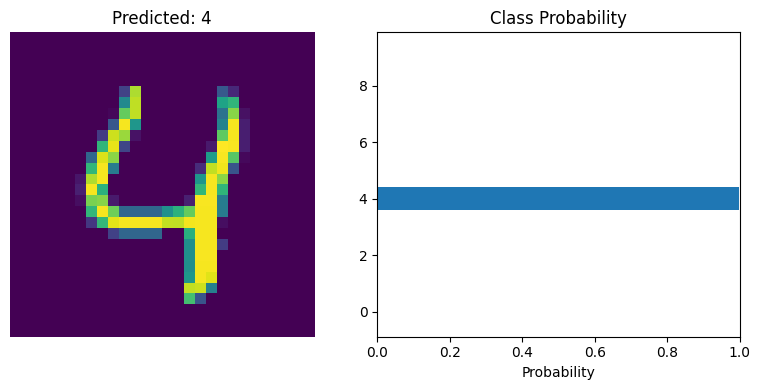

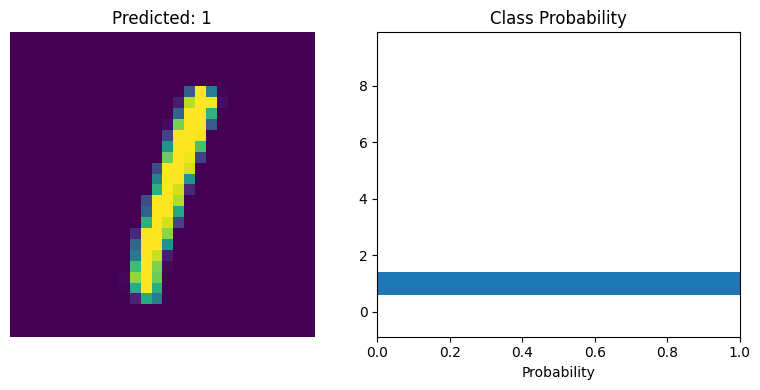

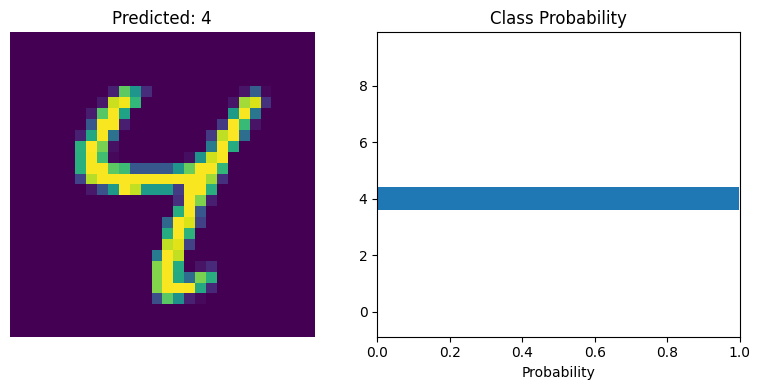

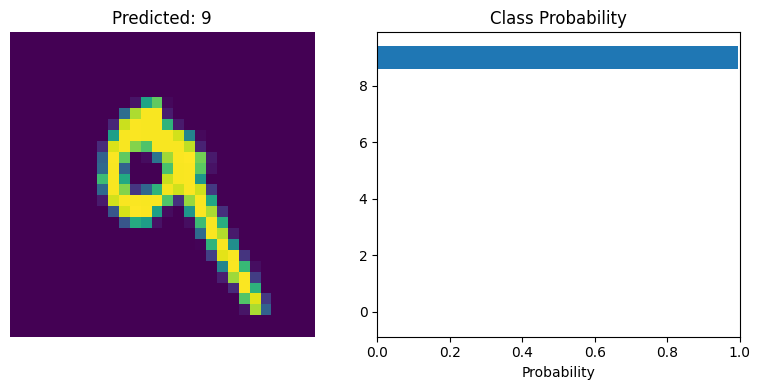

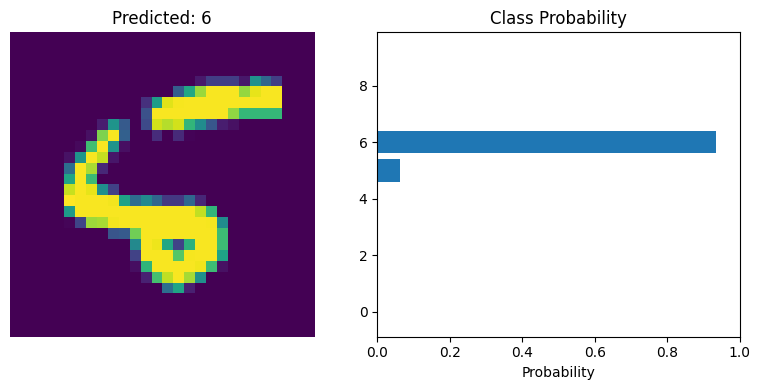

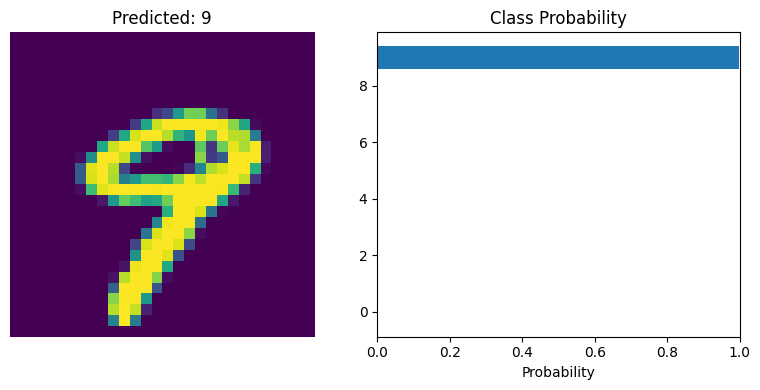

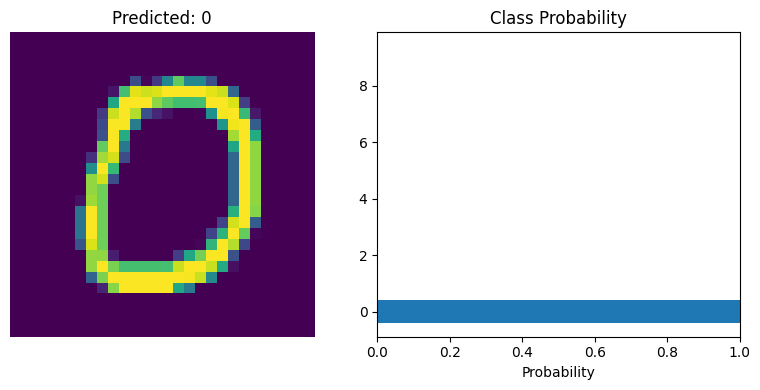

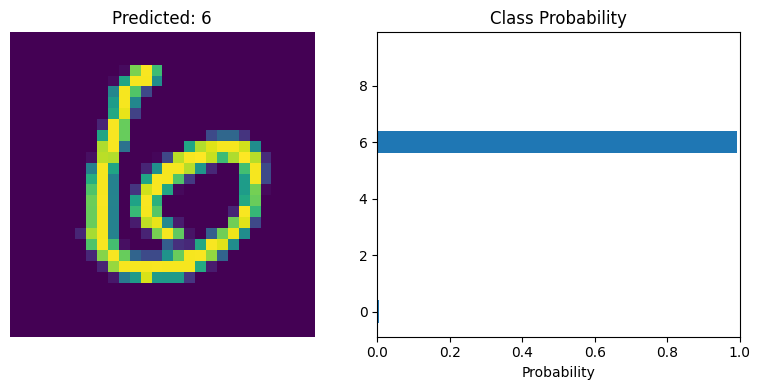

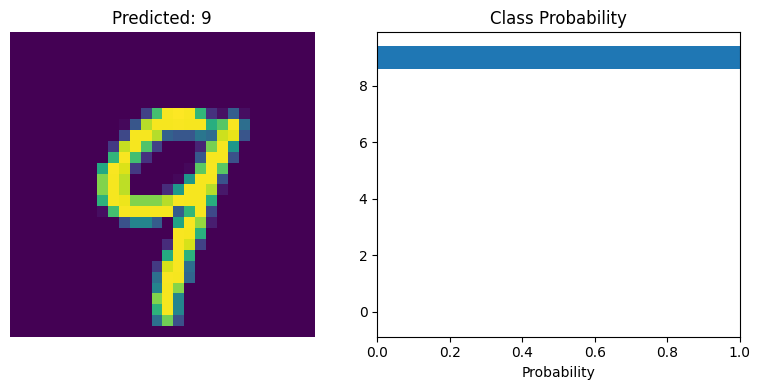

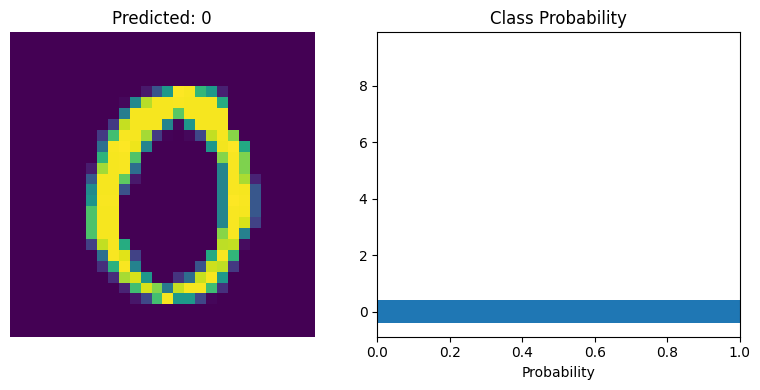

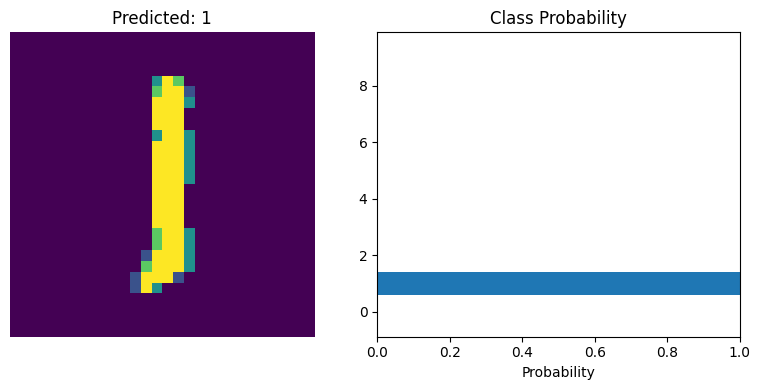

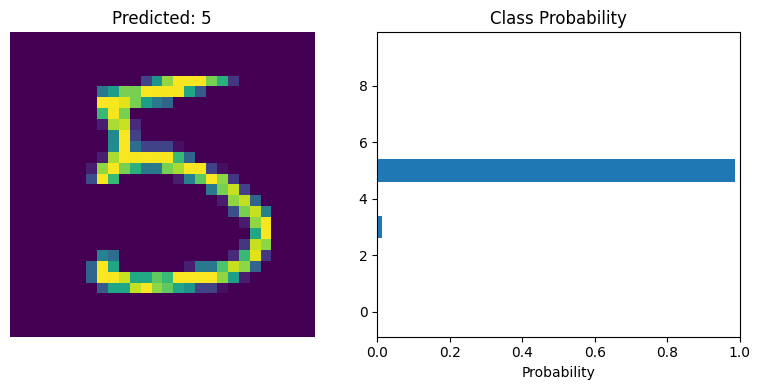

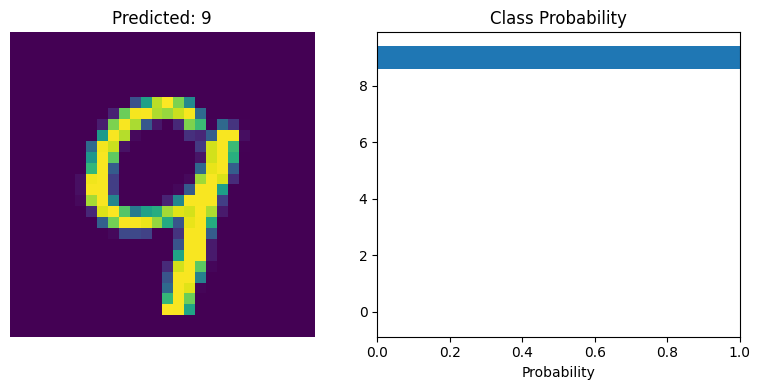

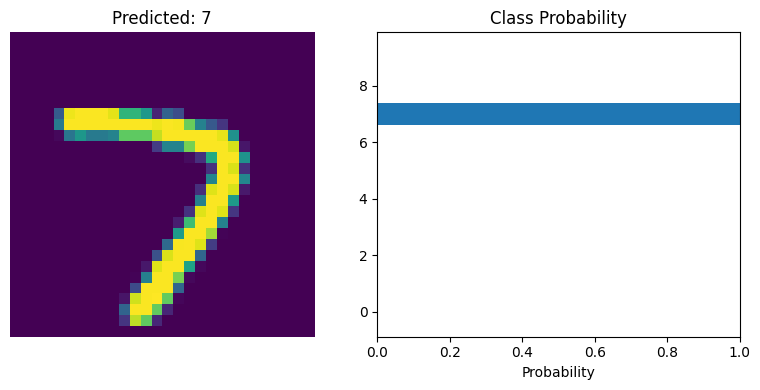

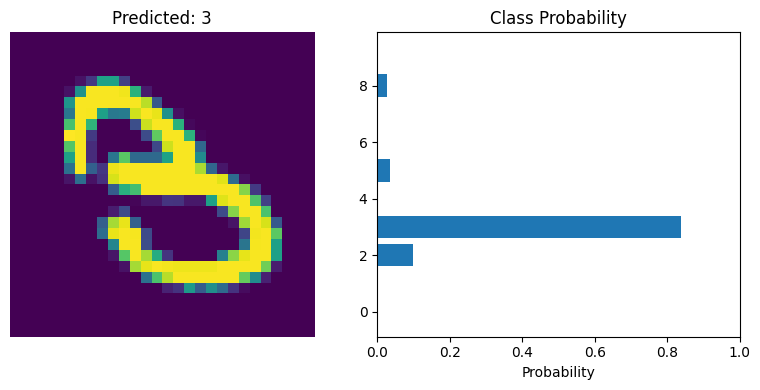

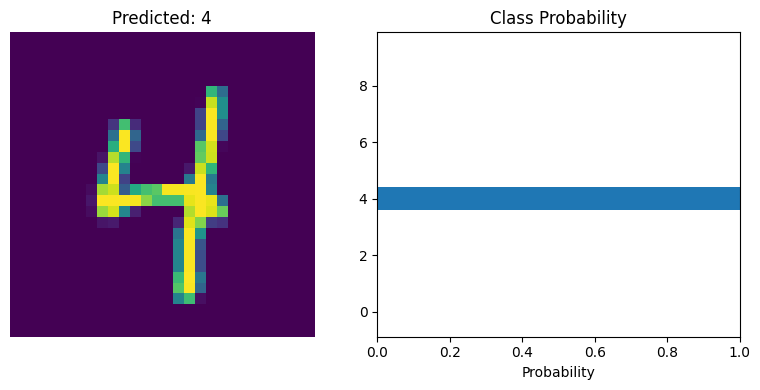

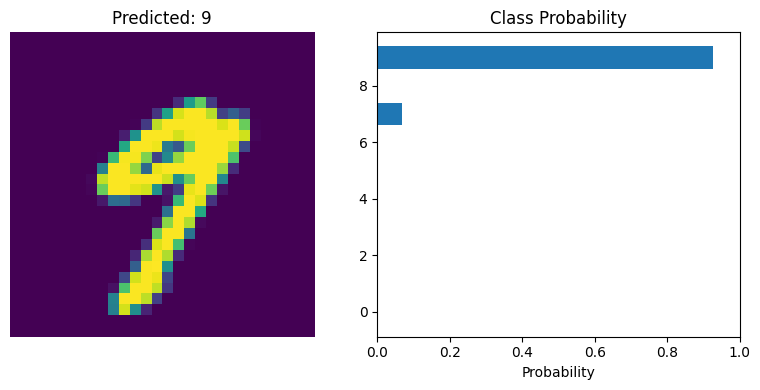

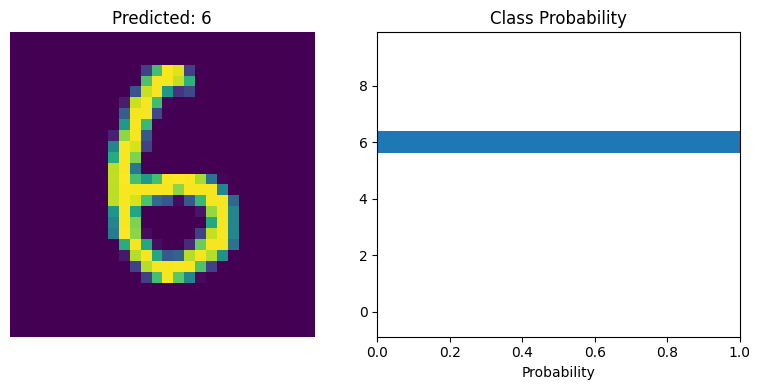

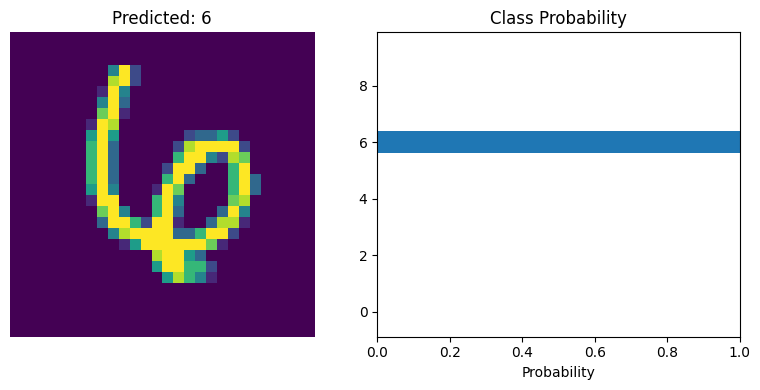

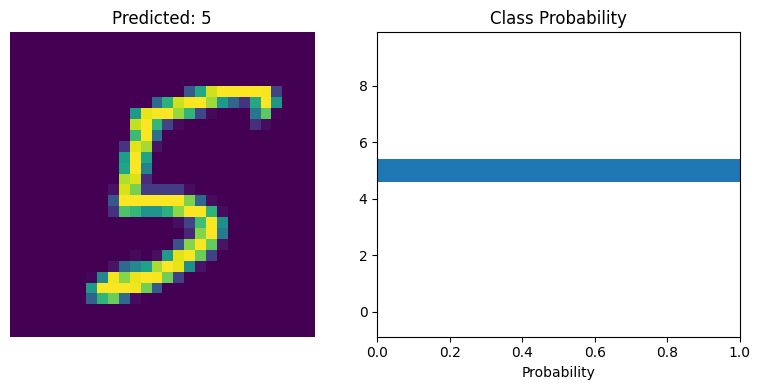

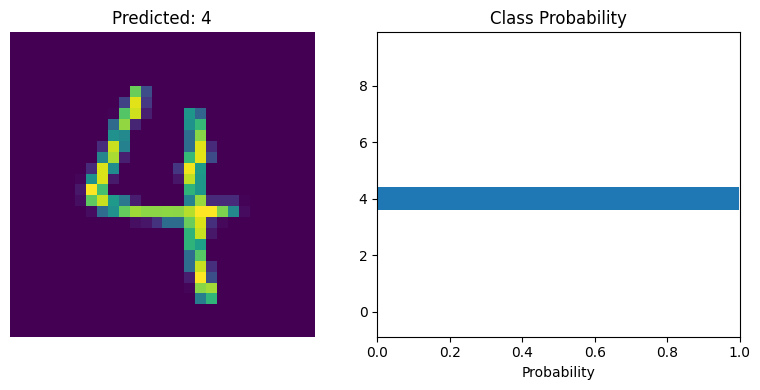

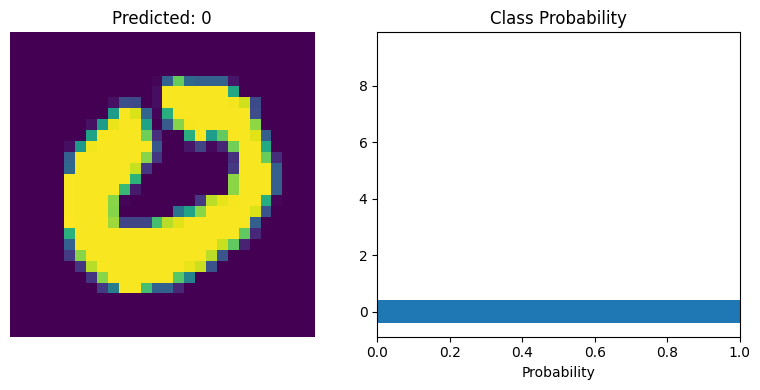

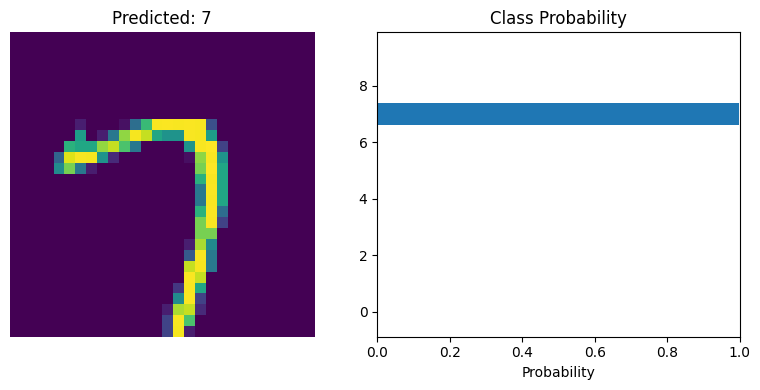

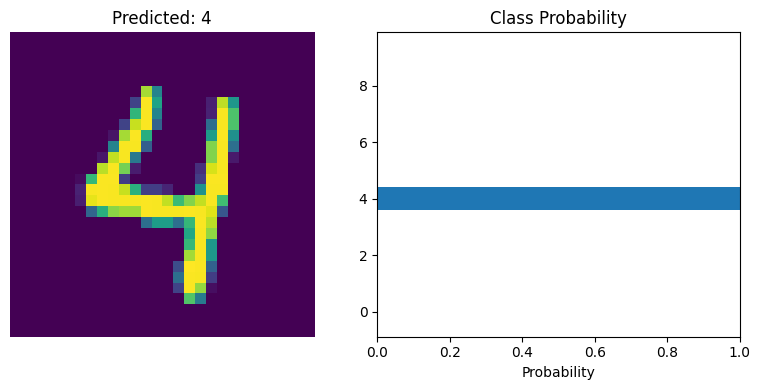

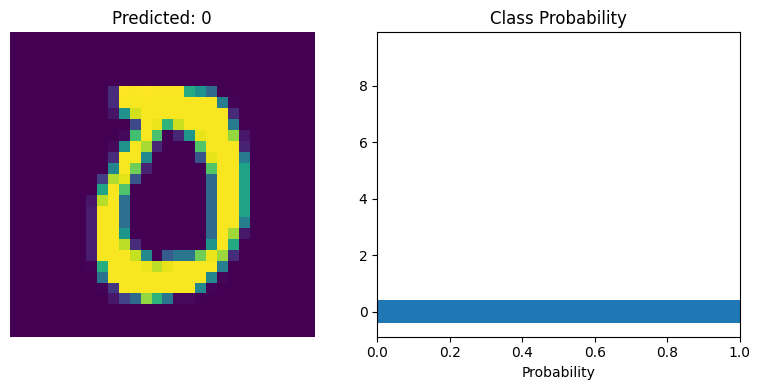

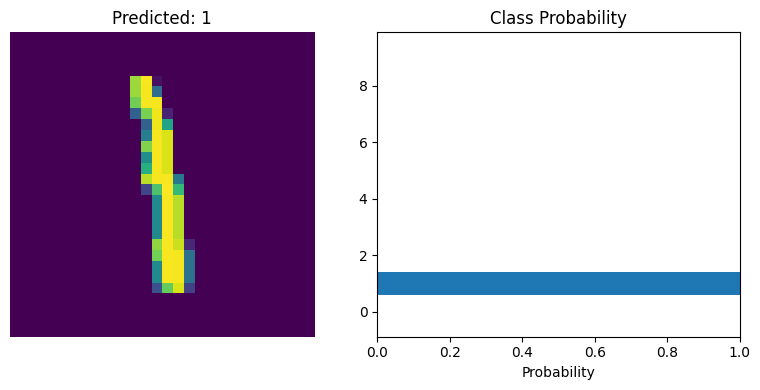

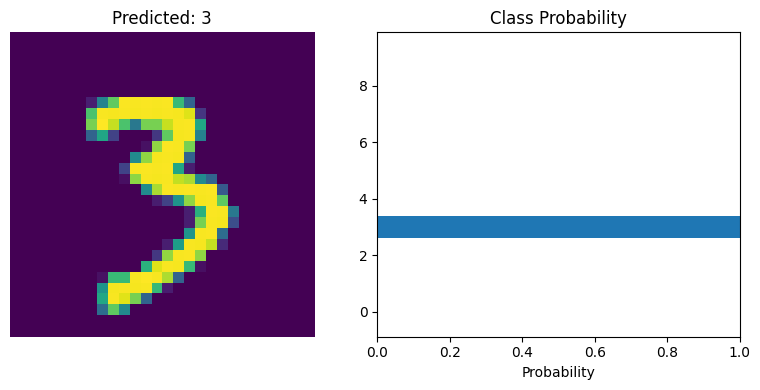

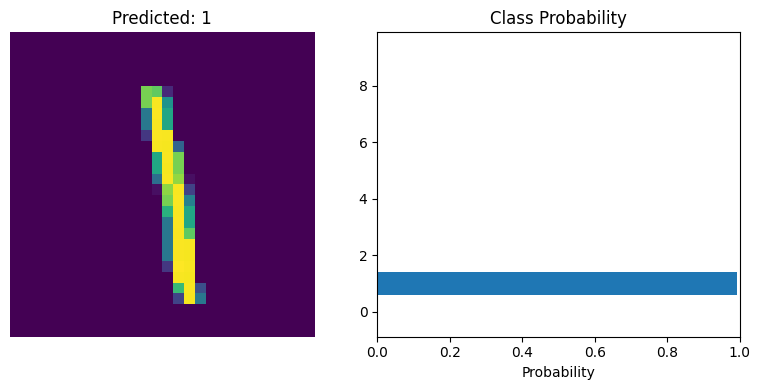

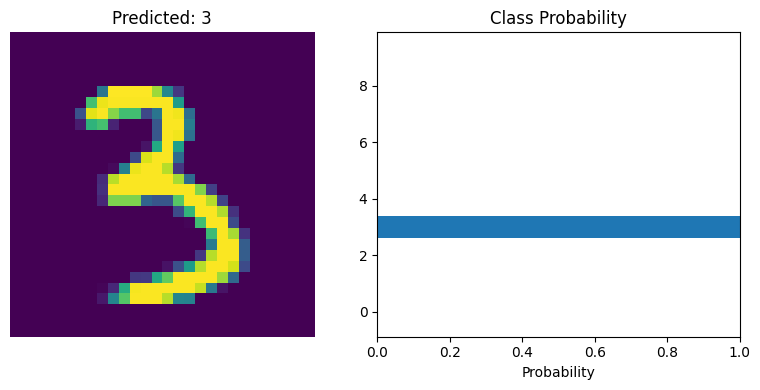

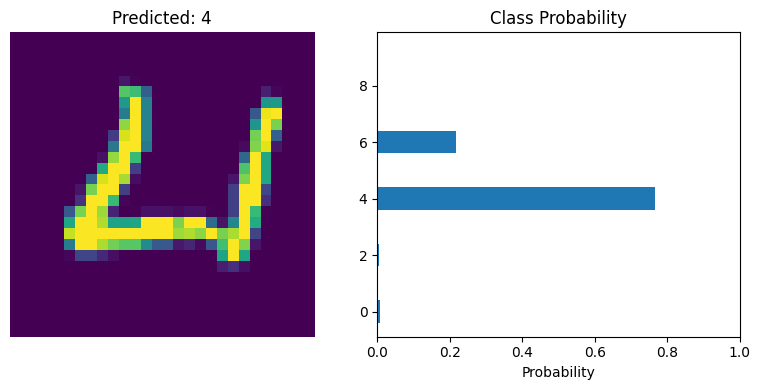

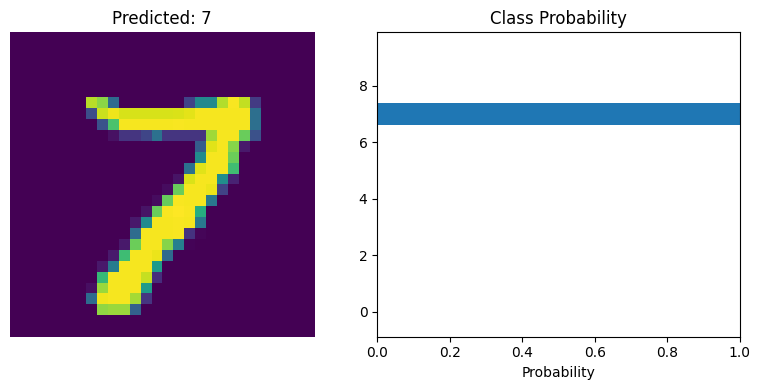

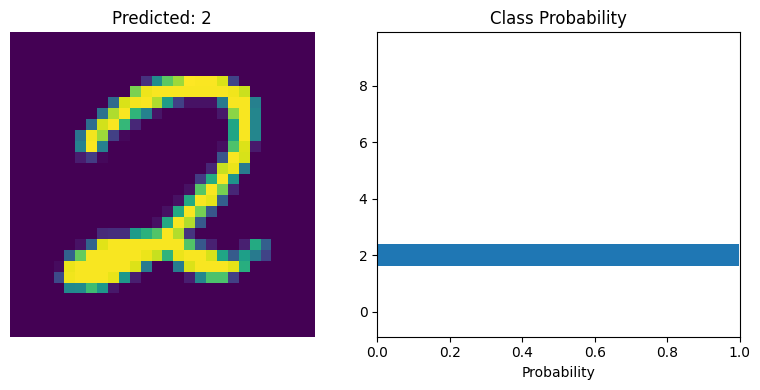

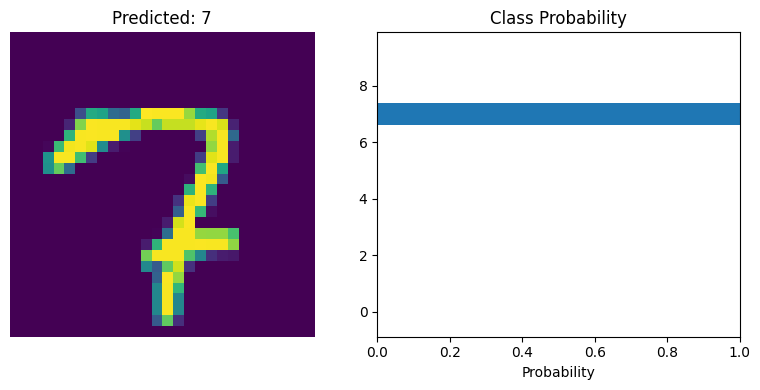

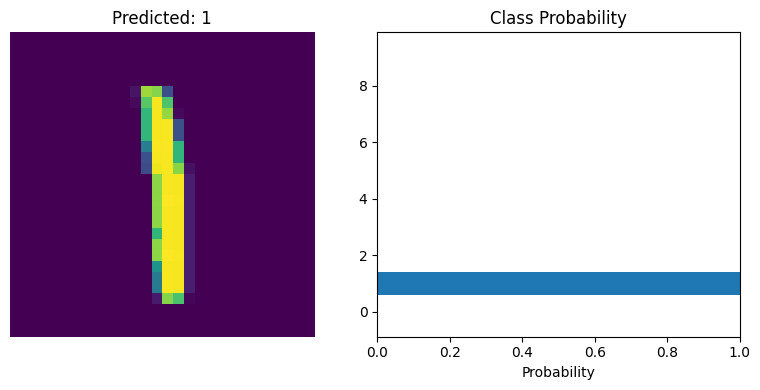

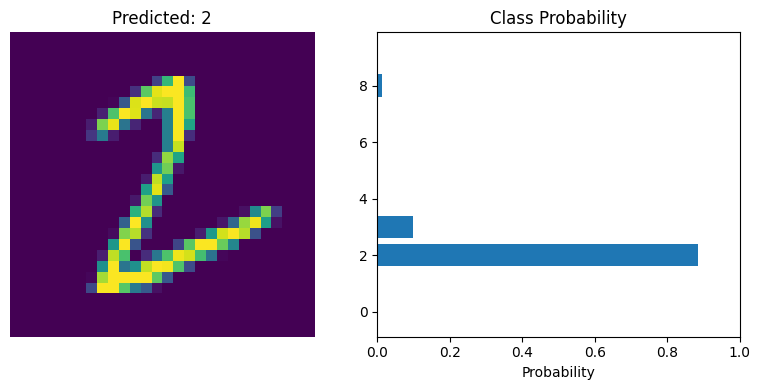

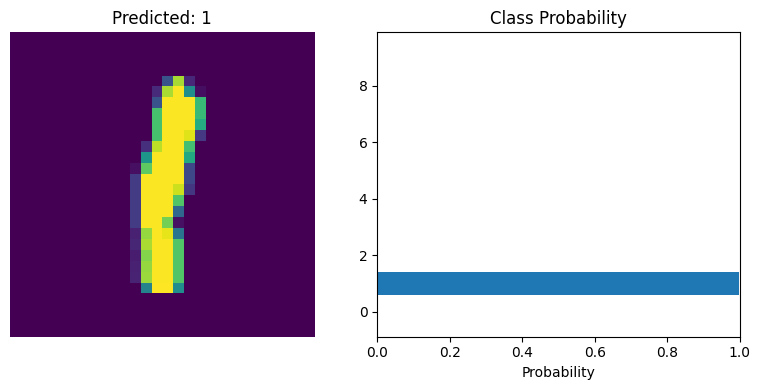

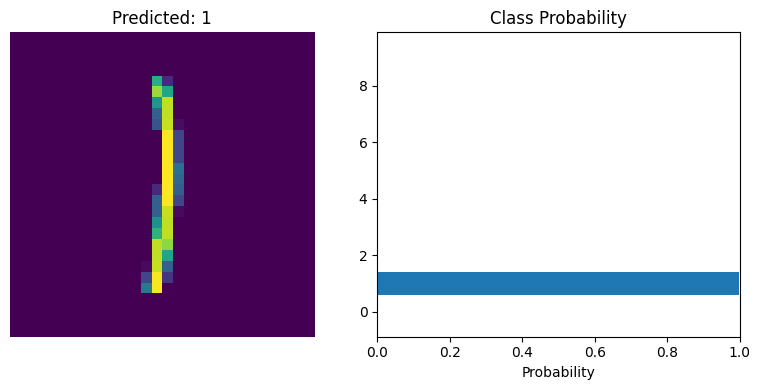

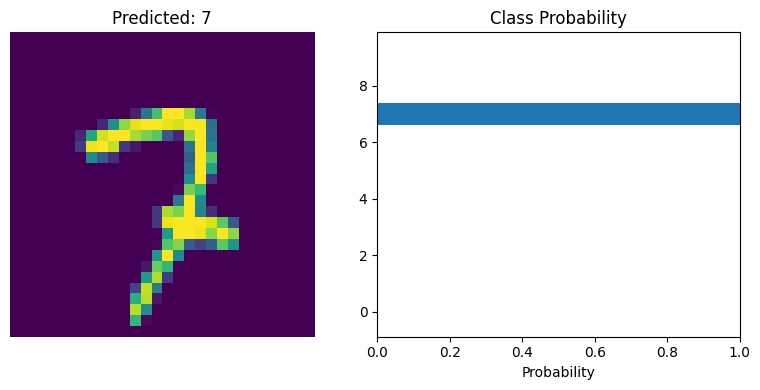

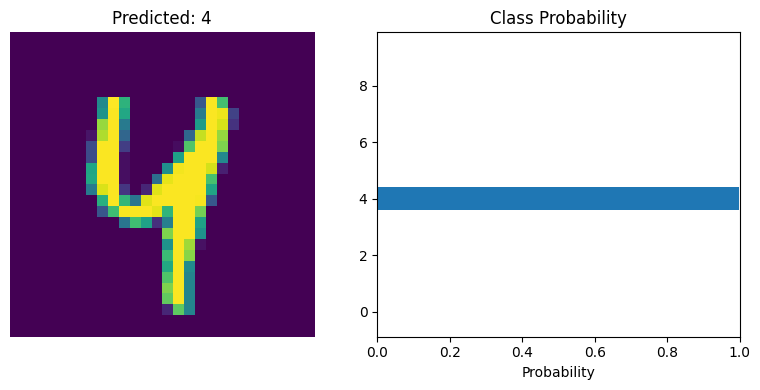

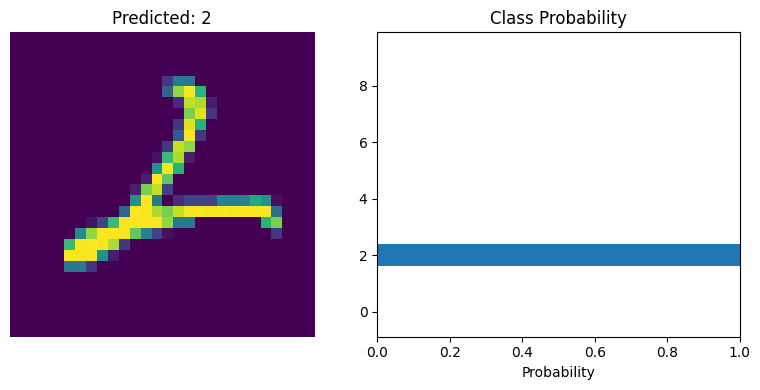

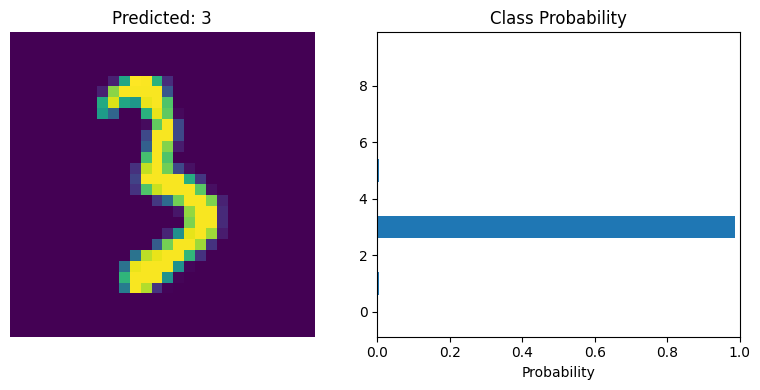

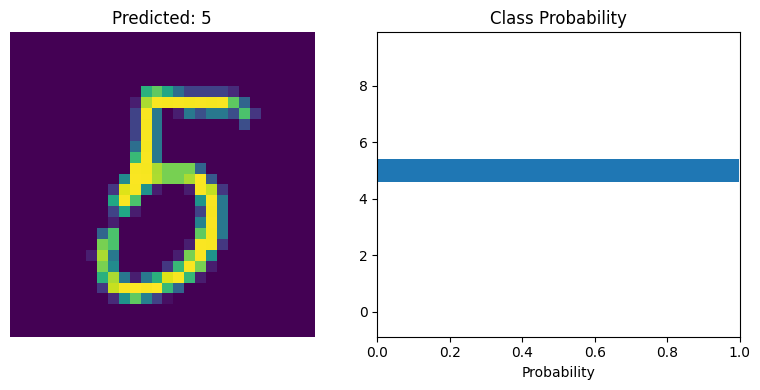

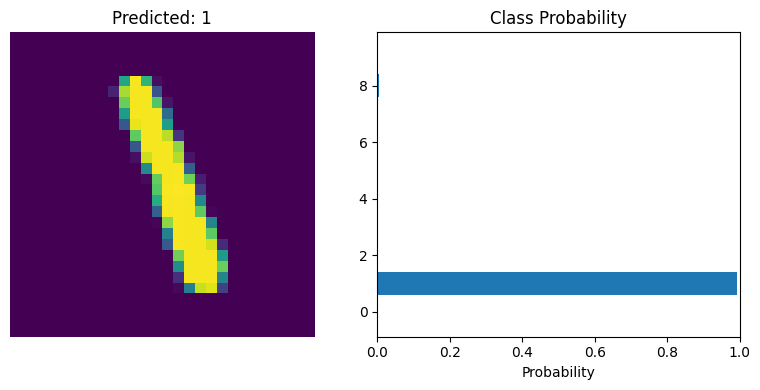

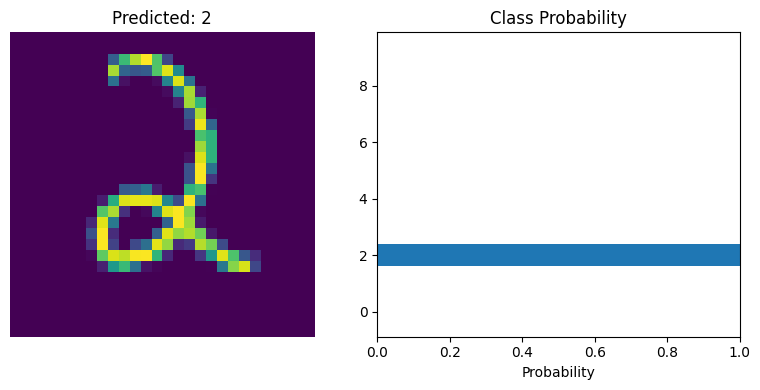

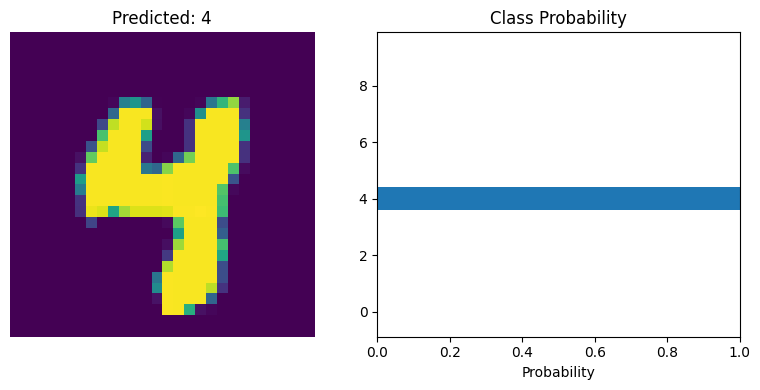

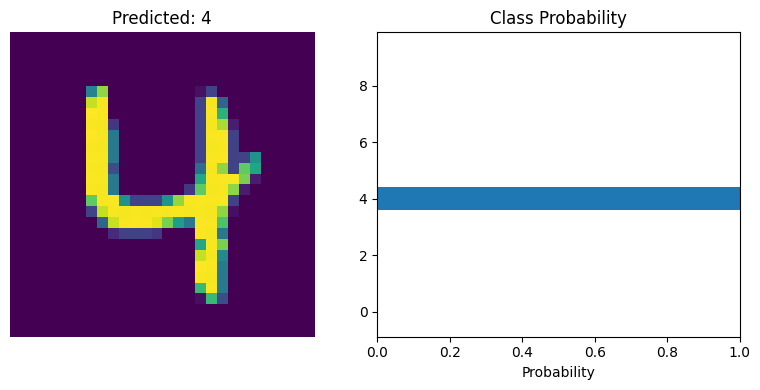

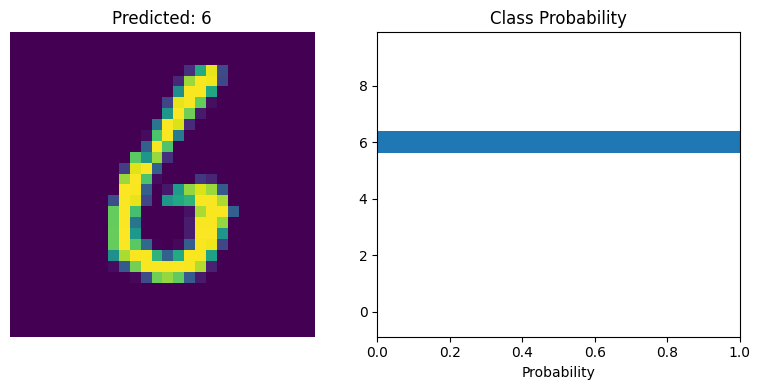

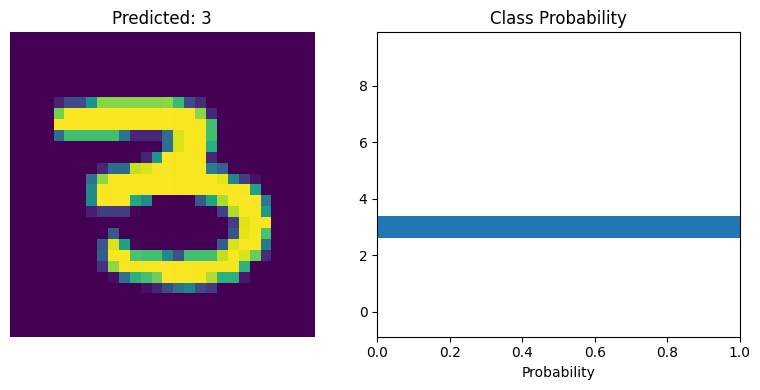

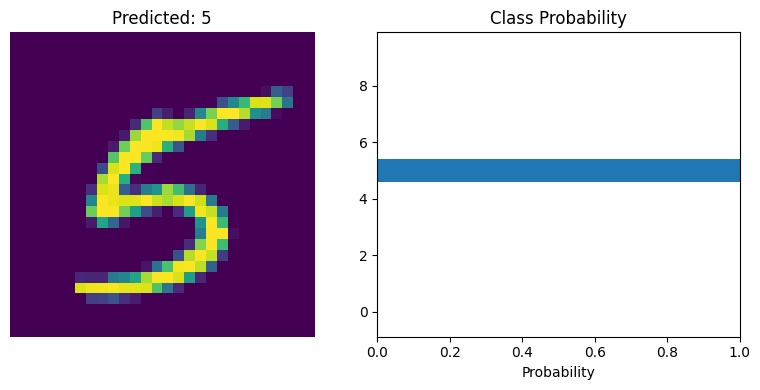

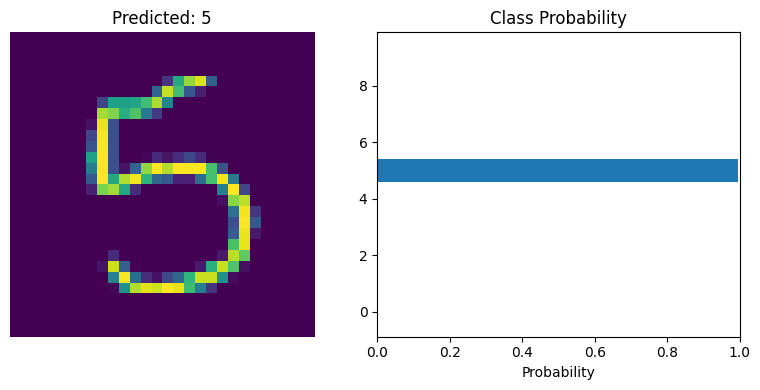

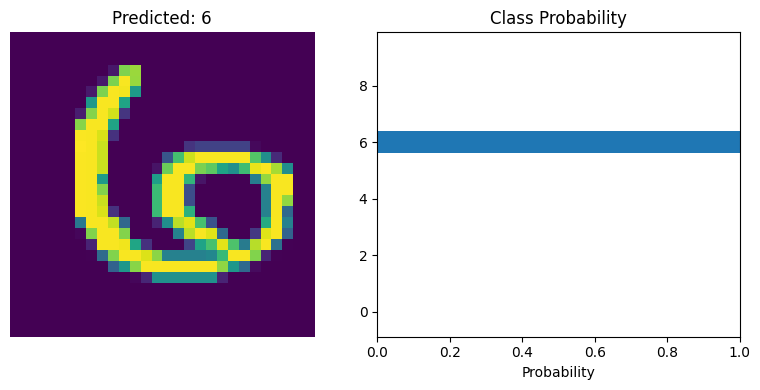

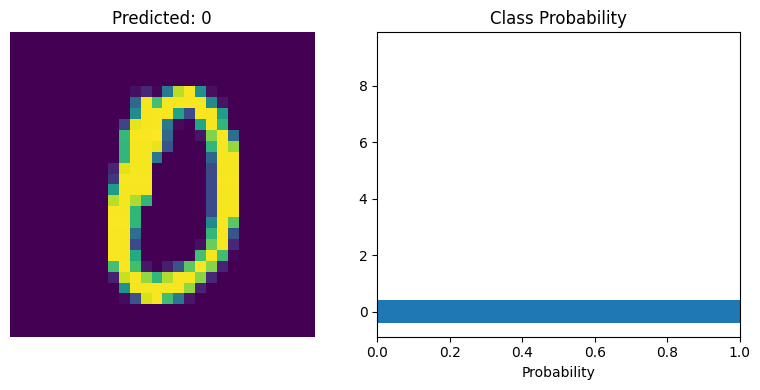

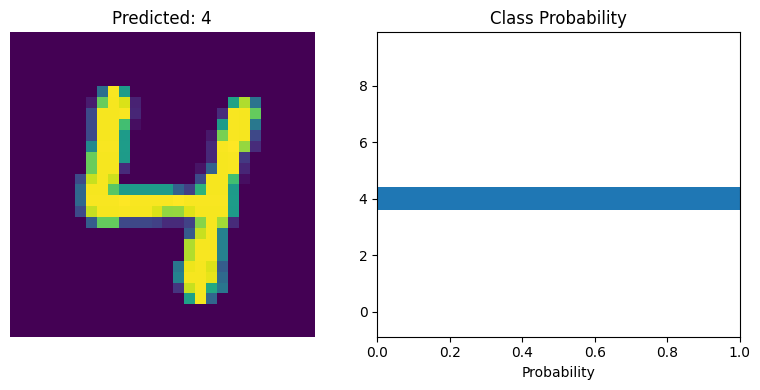

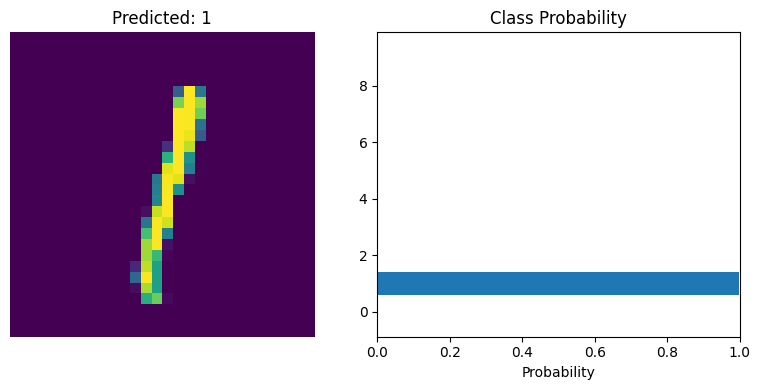

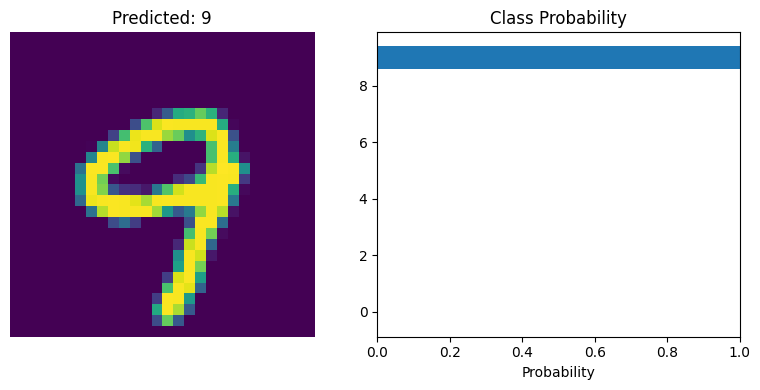

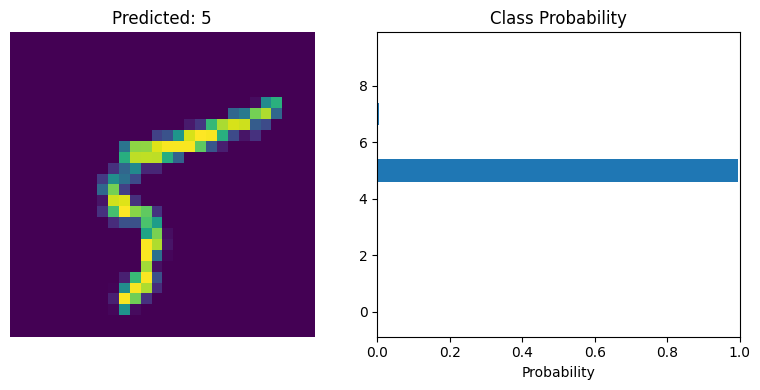

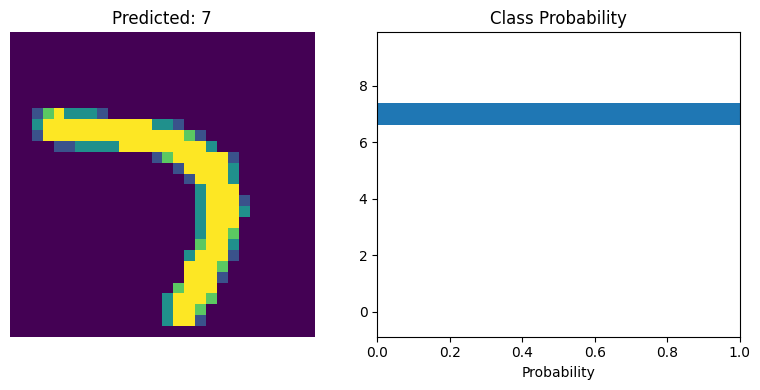

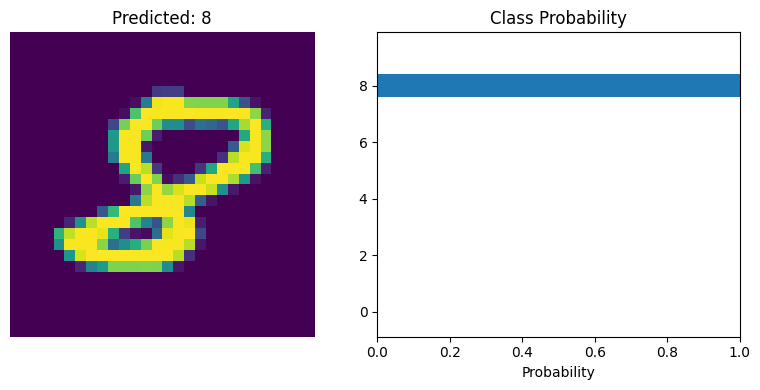

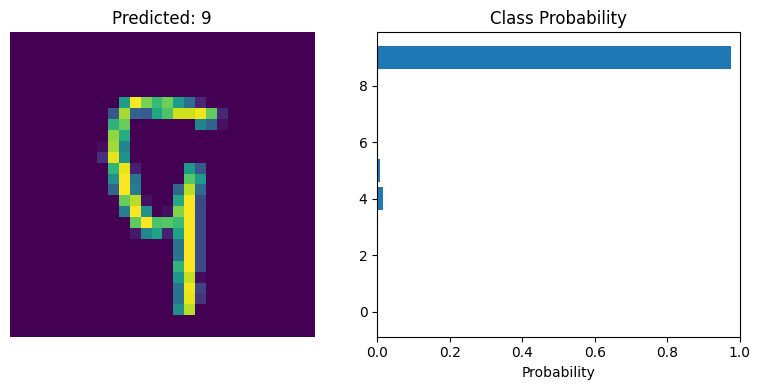

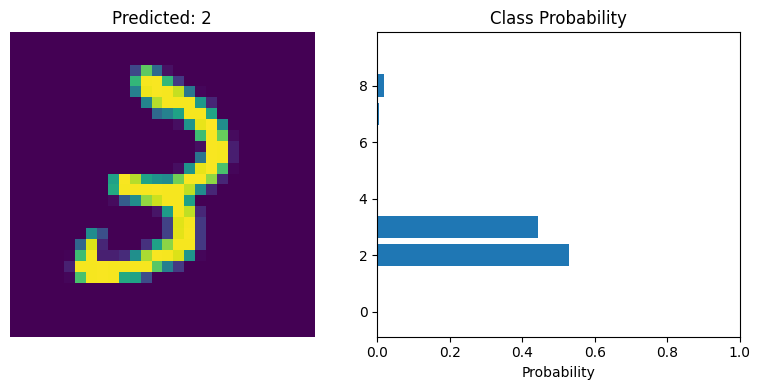

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Define transformations for MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./raw', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./raw', train=False, transform=transform, download=True)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10  
for epoch in range(epochs):
    model.train()  
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()  
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()  
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")

# Save the trained model
torch.save(model.state_dict(), "model.pth")
print("Model training complete. Weights saved to 'model.pth'.")

# Evaluate the model on the test dataset
model.eval()  
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the MNIST test dataset: {100 * correct / total:.2f}%')

# Visualization helper function
def view_classify(img, ps, class_names=None):
    if class_names is None:
        class_names = list(range(10))

    # Squeeze tensors to remove batch dimension
    img = img.squeeze().numpy()  
    ps = ps.squeeze().detach().numpy()  

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    ax1.imshow(img, cmap='viridis')
    ax1.axis('off')

    ax2.barh(class_names, ps)
    ax2.set_xlim(0, 1)
    ax2.set_xlabel("Probability")
    ax2.set_title("Class Probability")

    predicted_class = np.argmax(ps)
    ax1.set_title(f"Predicted: {predicted_class}", fontsize=12)

    plt.tight_layout()
    plt.show()

# Test and visualize on one sample
model.eval()  
# Visualize the full batch
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)  
        probabilities = F.softmax(outputs, dim=1)  
        for i in range(images.size(0)):  
            view_classify(images[i].view(1, 28, 28), probabilities[i:i+1])
        break  



/tmp/ipykernel_235900/1637748792.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model.pth"))


Accuracy on handwritten dataset: 46.99%


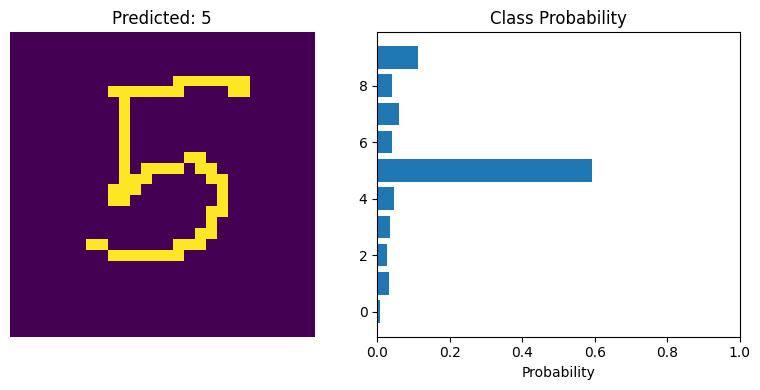

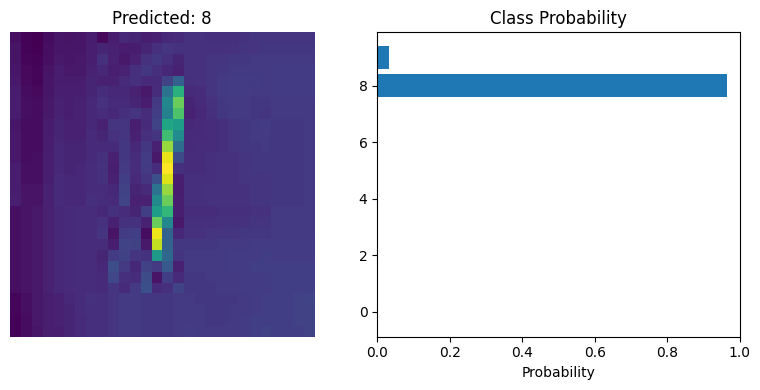

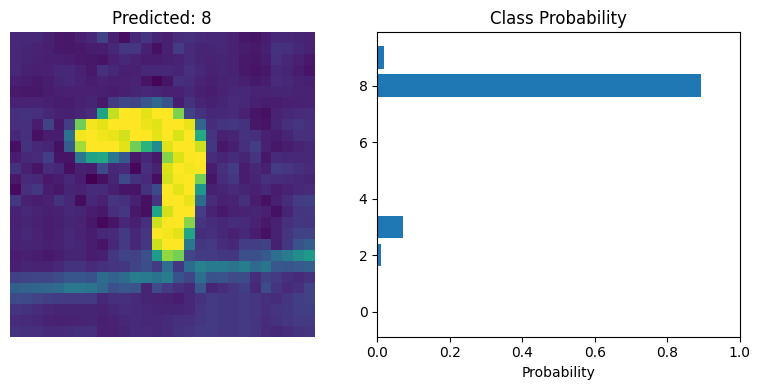

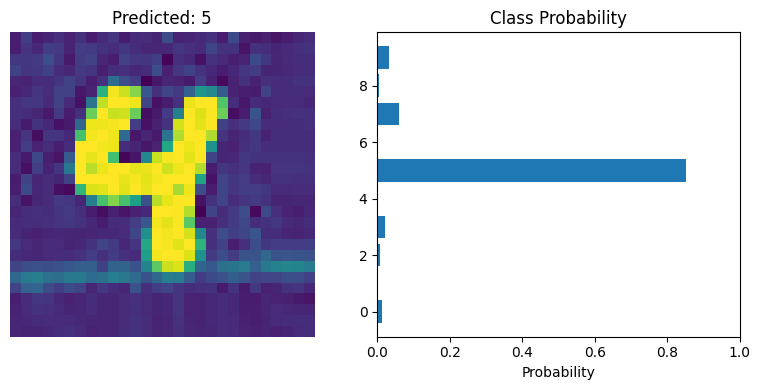

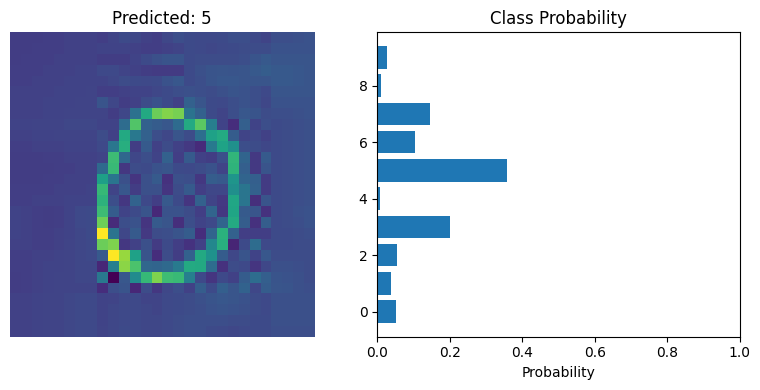

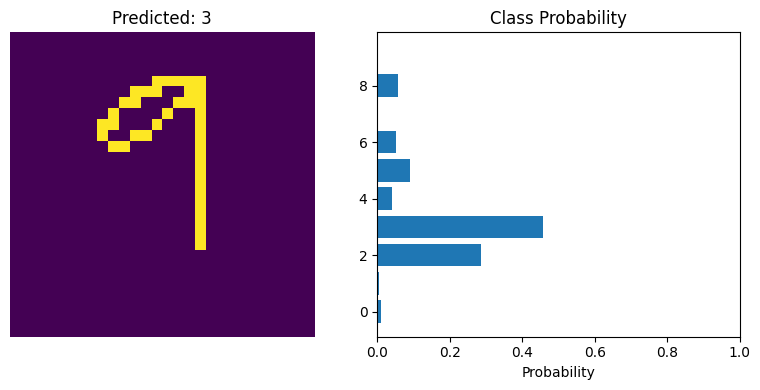

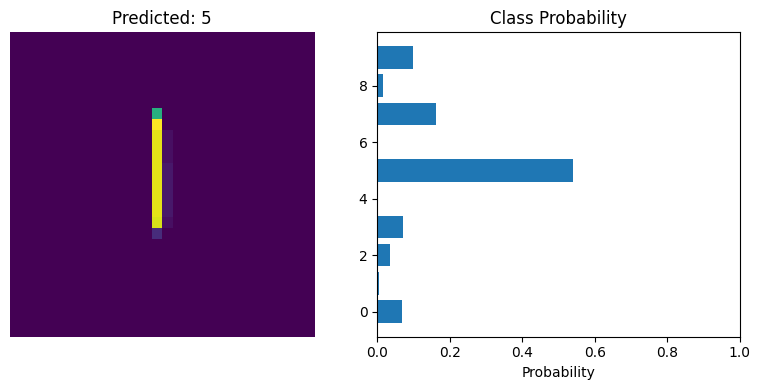

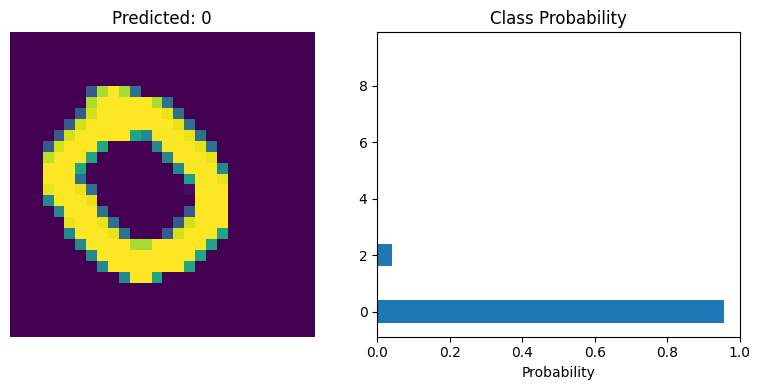

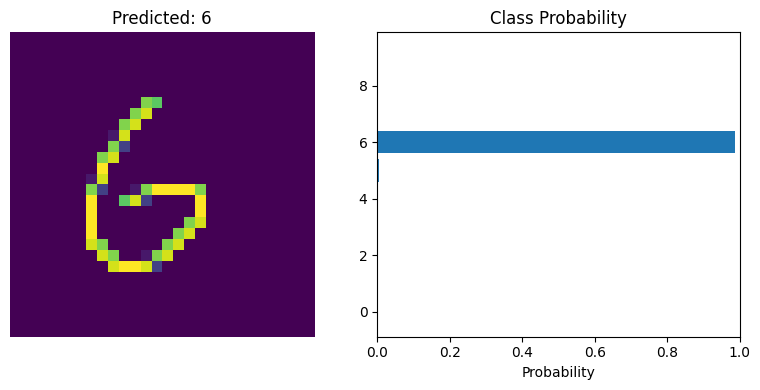

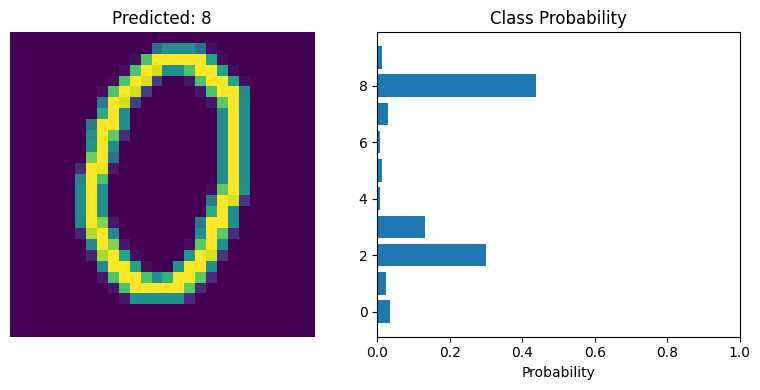

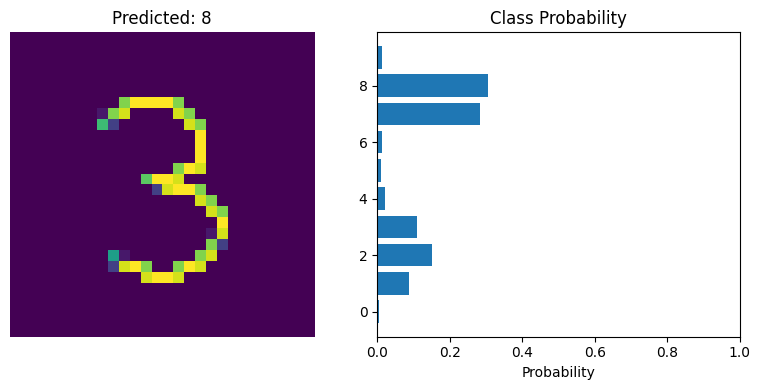

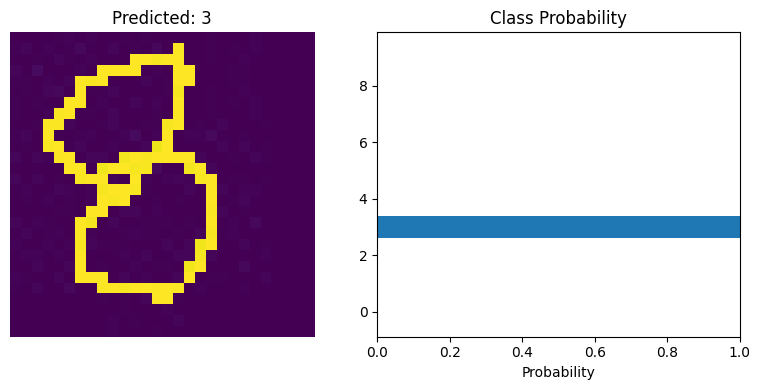

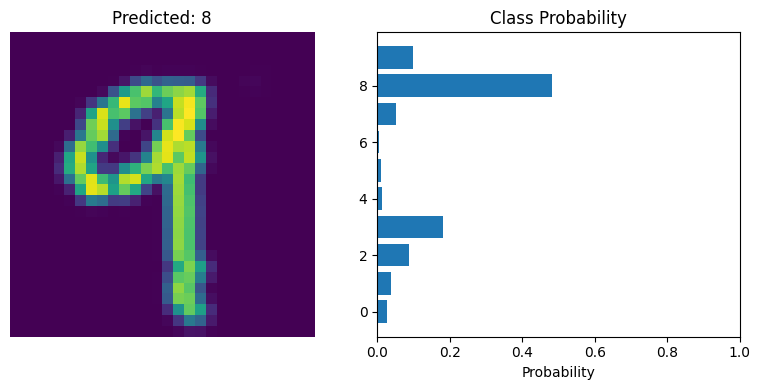

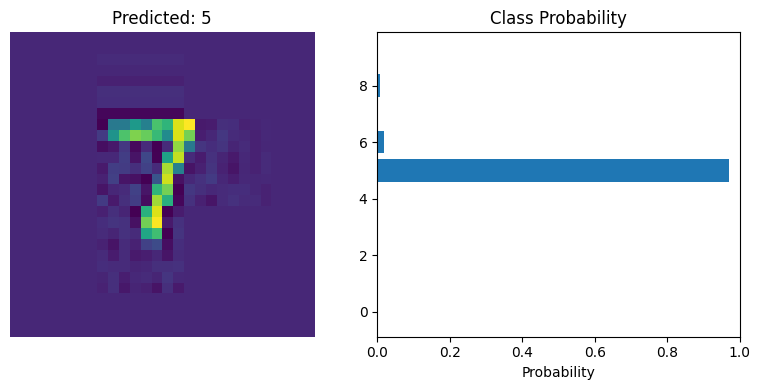

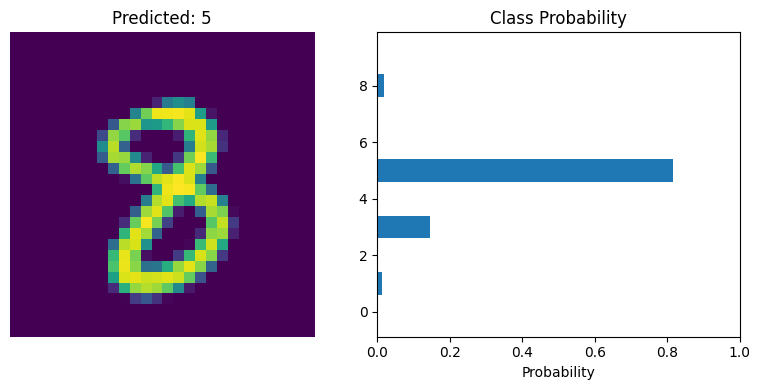

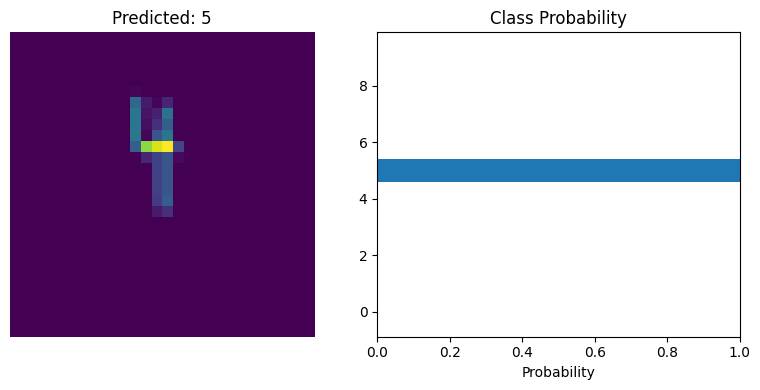

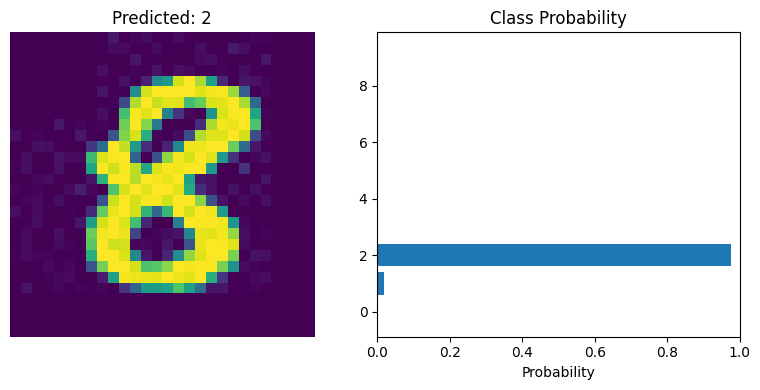

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
import os
import matplotlib.pyplot as plt
import numpy as np

# Define the custom dataset class
class DigitsDataset(torch.utils.data.Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.file_names = os.listdir(folder_path)
        self.transform = transform

    def __len__(self):
        return len(self.file_names)

    def __getitem__(self, idx):
        file_name = self.file_names[idx]
        file_path = os.path.join(self.folder_path, file_name)
        label = int(file_name.split('-')[0]) 
        image = Image.open(file_path).convert("L")  
        if self.transform:
            image = self.transform(image)
        return image, label

# Define the model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 28 * 28) 
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

transform = transforms.Compose([
    transforms.Resize((28, 28)), 
    transforms.ToTensor(),        
    transforms.Normalize((0.5,), (0.5,))  
])

dataset = DigitsDataset(folder_path='./digits', transform=transform)
data_loader = DataLoader(dataset, batch_size=64, shuffle=False)

# Load the pretrained model
model = NeuralNet()
model.load_state_dict(torch.load("model.pth"))
model.eval()  
correct = 0
total = 0
with torch.no_grad():
    for images, labels in data_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on handwritten dataset: {100 * correct / total:.2f}%')

# Visualize predictions
def view_classify(img, ps, class_names=None):
    if class_names is None:
        class_names = list(range(10)) 
    img = img.squeeze().numpy() 
    ps = ps.squeeze().detach().numpy()  
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.imshow(img, cmap='viridis')
    ax1.axis('off')
    ax2.barh(class_names, ps)
    ax2.set_xlim(0, 1)
    ax2.set_xlabel("Probability")
    ax2.set_title("Class Probability")
    predicted_class = np.argmax(ps)
    ax1.set_title(f"Predicted: {predicted_class}", fontsize=12)
    plt.tight_layout()
    plt.show()

# Test and visualize
with torch.no_grad():
    for images, labels in data_loader:
        outputs = model(images)
        probabilities = F.softmax(outputs, dim=1)
        view_classify(images[2].view(1, 28, 28), probabilities[0:1])
